# Assignment 6-11

# 1

1
Write a function so that the columns of the output matrix are powers of
the input vector.
The order of the powers is determined by the increasing boolean argument. Specifically, when
increasing is False, the i-th output column is the input vector raised element-wise to the power
of N - i - 1.

HINT: Such a matrix with a geometric progression in each row is named for Alexandre-
Theophile Vandermonde.

In [2]:
import numpy as num_py

# Function
def matrix_Vandermonde(input_vector,n,bool_arg):
    '''This function Will return Matrix in which 
    the columns of the output matrix are powers of the input vector.'''
    
    output_matrix=num_py.vander(x=input_vector,N=n,increasing=bool_arg)
    return output_matrix

# input paramater
input_vector = num_py.arange(9,22,2)   # input vector ( 1-D array)
n = 5                                  # no. of column in matrix 
bool_arg_T = True                      # boolean argument
bool_arg_F = False                     # boolean argument

# function execution
out_matrix_True=matrix_Vandermonde(input_vector,n,bool_arg_T)

out_matrix_False=matrix_Vandermonde(input_vector,n,bool_arg_F)

#output
print("Input vector \n",input_vector,"\n")
print("Output Matrix , when boolean argument is True: \n",out_matrix_True,"\n")
print("Output Matrix , when boolean argument is False: \n",out_matrix_False)

Input vector 
 [ 9 11 13 15 17 19 21] 

Output Matrix , when boolean argument is True: 
 [[     1      9     81    729   6561]
 [     1     11    121   1331  14641]
 [     1     13    169   2197  28561]
 [     1     15    225   3375  50625]
 [     1     17    289   4913  83521]
 [     1     19    361   6859 130321]
 [     1     21    441   9261 194481]] 

Output Matrix , when boolean argument is False: 
 [[  6561    729     81      9      1]
 [ 14641   1331    121     11      1]
 [ 28561   2197    169     13      1]
 [ 50625   3375    225     15      1]
 [ 83521   4913    289     17      1]
 [130321   6859    361     19      1]
 [194481   9261    441     21      1]]


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

2. Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average
of the given sequence is defined as follows:

The moving average sequence has n-k+1 elements as shown below.

The moving averages with k=4 of a ten-value sequence (n=10) is shown below

i 1 2 3 4 5 6 7 8 9 10

===== == == == == == == == == == ==

Input 10 20 30 40 50 60 70 80 90 100

y1 25 = (10+20+30+40)/4

y2 35 = (20+30+40+50)/4

y3 45 = (30+40+50+60)/4

y4 55 = (40+50+60+70)/4

y5 65 = (50+60+70+80)/4

y6 75 = (60+70+80+90)/4

y7 85 = (70+80+90+100)/4

Thus, the moving average sequence has n-k+1=10-4+1=7 values.

Question: Write a function to find moving average in an array over a window:
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [3]:
import numpy as num_py

# function
def moving_average_seq(input_array,k):
    ''' This function will return moving average in an array.'''
    val_array=num_py.cumsum(input_array,dtype=float)    
    val_array[3:]=val_array[3:]-val_array[:-3]
    return val_array[3-1:]/3

#input values 
lst =[3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
input_array = num_py.array(lst)
    
# output 
# Thus, total movieng average sequence are 13-3+1 = 11 values  ; where n=13 , k=3
output_array=moving_average_seq(input_array,k=3)
print("Input: Moving average of values ",lst," are :\n")
print("Output:\n",output_array)

Input: Moving average of values  [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]  are :

Output:
 [  5.           4.66666667   5.66666667   6.66666667   9.66666667
  28.66666667  49.33333333  72.66666667  84.          93.33333333
 116.33333333]


# 2

1) How-to-count-distance-to-the-previous-zero

For each value, count the difference of the distance from the previous zero (or the start
of the Series, whichever is closer) and if there are no previous zeros, print the position

Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}

The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.

import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [4]:
import pandas as pd
#Create data frame
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
#Convert DataFrame 'df' into series object
df_series=df['X']
#Get counter value for available 0 in dataframe 
x=[(df_series.tolist()[i::-1]+[0]).index(0) for i in range(len(df_series.tolist()))]
#Assign value into Data Frame with 'Y' column
df['Y']=x


#Output
print("Output \n")
print("DataFrame Input column values are \n",df['X'].tolist(),"\n")
print("The Counter position for availabvle zero in dataframe column is \n",x,"\n")
print("Output DataFrame \n")
df

Output 

DataFrame Input column values are 
 [7, 2, 0, 3, 4, 2, 5, 0, 3, 4] 

The Counter position for availabvle zero in dataframe column is 
 [1, 2, 0, 1, 2, 3, 4, 0, 1, 2] 

Output DataFrame 



,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a
Series of random numbers.

In [5]:
import pandas as pd
import numpy as np

# Cretae Date data for business days of year 2015
datedata= pd.date_range(start='2015-01-01',end='2015-12-31',freq='B')
#create random number based upon date data
randomNum=np.random.rand(len(datedata))
#create Series object form pandas
s= pd.Series(randomNum,index=datedata)
print("Output \n")
print("Few Observation of Series object are \n",s.head(),"\n")
print("Index of Series object are \n",s.index)

Output 

Few Observation of Series object are 
 2015-01-01    0.408198
2015-01-02    0.050329
2015-01-05    0.680733
2015-01-06    0.535986
2015-01-07    0.501187
Freq: B, dtype: float64 

Index of Series object are 
 DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')


3) Find the sum of the values in s for every Wednesday

In [6]:
s[datedata.weekday_name=='Wednesday'].head()
print("Output")
print("Sum of values for Wedensday in s:")
s[datedata.weekday_name=='Wednesday'].sum()

Output
Sum of values for Wedensday in s:


28.83195967830611

4 : Average For each calendar month

In [7]:
s.resample('M',convention='end').mean()

2015-01-31    0.670379
2015-02-28    0.567680
2015-03-31    0.539109
2015-04-30    0.492705
2015-05-31    0.497058
2015-06-30    0.510494
2015-07-31    0.483224
2015-08-31    0.527635
2015-09-30    0.462351
2015-10-31    0.627795
2015-11-30    0.514825
2015-12-31    0.483953
Freq: M, dtype: float64

5) For each group of four consecutive calendar months in s, find the date on which the
highest value occurred.

In [8]:
print("Output")
print("Duration of consecutive 4 months  , till that highest value recorded \n")
print(s.groupby(pd.Grouper(freq='4M')).idxmax(),"\n")
print("Maximum value for the recorde date \n")
print(s[s.groupby(pd.Grouper(freq='4M')).idxmax()])

Output
Duration of consecutive 4 months  , till that highest value recorded 

2015-01-31   2015-01-27
2015-05-31   2015-04-22
2015-09-30   2015-09-18
2016-01-31   2015-12-16
dtype: datetime64[ns] 

Maximum value for the recorde date 

2015-01-27    0.993391
2015-04-22    0.966983
2015-09-18    0.999202
2015-12-16    0.991539
dtype: float64


6. Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam
es_right.csv

Questions:
1) Delete unnamed columns

2) Show the distribution of male and female

3) Show the top 5 most preferred names

4) What is the median name occurrence in the dataset

5) Distribution of male and female born count by states


In [10]:
import pandas as pd

df_US_BabyData= pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

# show Dataset info
print("Dataset information \n",df_US_BabyData.info())

#sample data 
df_US_BabyData.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB
Dataset information 
 None


,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48


In [11]:
df_US_BabyData_DeltdCol= df_US_BabyData.drop(['Unnamed: 0'],axis=1)
print("Data after Delete unnamed columns   \n")
df_US_BabyData_DeltdCol.head()

Data after Delete unnamed columns   



,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [12]:
print("Distribution of male and female in  \n")
round(df_US_BabyData['Gender'].value_counts(normalize=True)*100,2)

Distribution of male and female in  



F    54.98
M    45.02
Name: Gender, dtype: float64

In [13]:
print("Top 5 most preferred names  \n")

df_US_BabyData[["Name","Count"]].groupby('Name').sum().sort_values("Count",ascending=0).head(5)

Top 5 most preferred names  



,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


In [14]:
df_US_BabyData_median_Name=df_US_BabyData[["Name","Count"]].groupby('Name').sum()

print("Median name occurence in the dataset \n")
df_US_BabyData_median_Name[df_US_BabyData_median_Name['Count'] == df_US_BabyData_median_Name['Count'].median()]

Median name occurence in the dataset 



,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


In [15]:
df_US_BabyData_Gender_Distribution= df_US_BabyData[['State','Gender','Count']].set_index(['State', 'Gender'])

print("Distribution of male and female born count by states \n")
df_US_BabyData_Gender_Distribution.groupby(['State','Gender']).sum()

Distribution of male and female born count by states 



Count
State Gender         
AK    F         26250
      M         37399
AL    F        215308
      M        260114
AR    F        129712
      M        162947
AZ    F        368567
      M        439691
CA    F       2414063
      M       2670584
CO    F        260805
      M        313425
CT    F        141350
      M        171397
DC    F         35276
      M         47228
DE    F         31312
      M         41748
FL    F        915422
      M       1060957
GA    F        549637
      M        635531
HI    F         37279
      M         53127
IA    F        144764
      M        174009
ID    F         72808
      M         94320
IL    F        695312
      M        791679
...               ...
OK    F        184967
      M        228613
OR    F        172111
      M        209445
PA    F        593382
      M        682709
RI    F         35560
      M         47939
SC    F        197917
      M        237442
SD    F         34104
      M         45443
TN    F        336487
      M        398615
TX    F       1786281
      M       2005394
UT    F        202892
      M        245324
VA    F        405503
      M        466873
VT    F         15079
      M         21353
WA    F        334944
      M        395377
WI    F        264921
      M        311758
WV    F         73800
      M         93557
WY    F         14107
      M         21912

[102 rows x 1 columns]

# 4

Matplotlib:
    
This assignment is for visualization using matplotlib:
    
data to use:
    
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
    
titanic = pd.read_csv(url)

Charts to plot:
    
1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [19]:
import numpy as np                        # Numpy Module
import pandas as pd                       # Pandas Module
import matplotlib.pyplot as plt           

titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


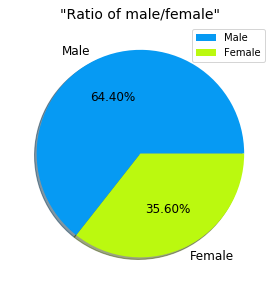

In [20]:
ratio_male_female= titanic['sex'].value_counts( normalize = True )
#Pie chart for Male-Female ratio representation
labels=['Male','Female']
colors=['xkcd:azure','xkcd:yellowgreen']

patches, text , percentage =plt.pie(ratio_male_female,  labels=labels, colors=colors,autopct='%1.2f%%',shadow=True)
#increase the size of text of pie chart and percentage
text[0].set_fontsize(12)
percentage[0].set_fontsize(12)
text[1].set_fontsize(12)
percentage[1].set_fontsize(12)

plt.legend(patches, labels, loc=1)
plt.tight_layout()
plt.title('"Ratio of male/female"').set_fontsize(14)
plt.show()

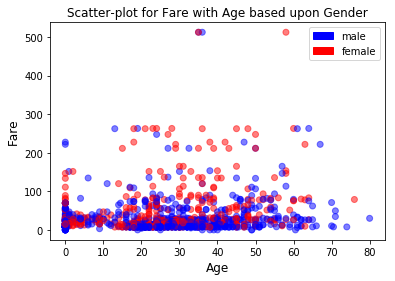

In [21]:
#Get data of sex, age , fare from titanic dataset

titanic_scatter=titanic[['sex','fare','age']].dropna( how = "all" ) #  remove NA /NaN if vailable in all columns


# identify NA / NaN values in for fare  and age columns
import numpy as np
index_fare = titanic_scatter['fare'].index[titanic_scatter['fare'].apply(np.isnan)]
index_age = titanic_scatter['age'].index[titanic_scatter['age'].apply(np.isnan)]
titanic_scatter.iloc[index_age]
titanic_scatter.iloc[index_fare]


# fill NA/ NaN with Zero (0.0) for fare  and age columns

titanic_scatter[['fare', 'age']] = titanic_scatter[['fare', 'age']].fillna(value=0)

# Generate Plot 

mapping = {'male' : 'blue', 'female' : 'red'}

# Import patvh and pyplot module for Legend generation
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='blue', label=list(mapping.keys())[0])
blue_patch = mpatches.Patch(color='red', label=list(mapping.keys())[1])


plt.scatter(titanic_scatter['age'],  titanic_scatter['fare'], alpha=0.5, c=titanic_scatter['sex'].map(mapping), label=mapping)

plt.title('Scatter-plot for Fare with Age based upon Gender').set_fontsize(12)
plt.xlabel('Age').set_fontsize(12)
plt.ylabel('Fare').set_fontsize(12)
plt.legend(handles=[red_patch,blue_patch] , loc=0)
plt.show()

# 5

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis? Take this monstrosity as the DataFrame to use in the following puzzles:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', ' (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})

1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. 

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [22]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})

In [23]:
df_Analysis= df

print("Dataset")
df_Analysis

Dataset


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [24]:
# to prevent jupyter warning action
pd.options.mode.chained_assignment = None


x,y = df_Analysis.FlightNumber.loc[[0]].values[0]+10, df_Analysis.FlightNumber.loc[[4]].values[0]-10

df_Analysis.FlightNumber.loc[[1]]=df_Analysis.FlightNumber.loc[[1]].fillna(x)

df_Analysis.FlightNumber.loc[[3]]=df_Analysis.FlightNumber.loc[[3]].fillna(y)

# convert flot type to int type
df_Analysis.FlightNumber = df_Analysis.FlightNumber.astype(int)

print("Output")
df_Analysis

Output


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [25]:
df_temp= df_Analysis.From_To.str.split('_', expand=True)
df_temp.columns = ['From', 'To']
print("Output")
df_temp

Output


,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [26]:
df_temp.From = df_temp.From.str.title()
df_temp.To = df_temp.To.str.title()
print("Output")
df_temp

Output


,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [27]:
df_Analysis=df_Analysis.drop("From_To", axis=1).join(df_temp)
print("Output")
df_Analysis

Output


,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [29]:
df_delays=pd.DataFrame(df_Analysis["RecentDelays"].values.tolist())
df_delays.columns = ['delay_{}'.format(n) for n in range(1, len(df_delays.columns)+1)]
df_delays

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [30]:
df_Analysis=df_Analysis.drop("RecentDelays" , axis=1).join(df_delays)
print("Output")
df_Analysis

Output


,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN


# 6

Read the following data set: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Rename the columns as per the description from this file: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Task:

Create a sql db from adult dataset and name it sqladb

1.Select 10 records from the adult sqladb

2.Show me the average hours per week of all men who are working in private sector

3.Show me the frequency table for education, occupation and relationship, separately

4.Are there any people who are married, working in private sector and having a masters degree

5.What is the average, minimum and maximum age group for people working in different sectors

6.Calculate age distribution by country

7.Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and 'capital-loss'

In [32]:
import pandas as pd
import sqlite3

In [33]:
aduldt_data_columns = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names', sep=":")
print("Columns Name for DataSet")
aduldt_data_columns.iloc[91:106,].index.tolist()

Columns Name for DataSet


['>50K, <=50K.',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [34]:
# Reorder columns 
aduldt_col_names= aduldt_data_columns.iloc[91:106,].index.tolist()
aduldt_col_names=aduldt_col_names[1:]+aduldt_col_names[0::-1]
aduldt_col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 '>50K, <=50K.']

In [36]:
#Read Data Set annd Apply coumns Names

adult_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , names=aduldt_col_names,header=None , index_col=False)
# Convert columns name to Title case
adult_data.columns=adult_data.columns.str.capitalize().tolist()
adult_data.head(2)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,">50k, <=50k."
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [37]:
# Create sqlab database using sqlite3 module 

connection = sqlite3.connect('sqladb.db') # Create Database
cursor = connection.cursor()

In [38]:
# Create table 

connection.execute('''
    CREATE TABLE IF NOT EXISTS ADULTS (
         Age INTEGER,
         Workclass VARCHAR(20),
         Fnlwgt INTEGER,
         Education VARCHAR(20),
         Education_num INTEGER,         
         Marital_status VARCHAR(30),         
         Occupation VARCHAR(20),
         Relationship VARCHAR(20),
         Race VARCHAR(20),
         Sex VARCHAR(10),
         Capital_gain INTEGER,
         Capital_loss INTEGER,
         Hours_per_week INTEGER,
         Native_country VARCHAR(30),
         '>50k, <=50k.' VARCHAR(10)
        
    )
''')

connection.commit()

In [39]:
# Insert Data into ADULTS table from  adult_data dataset(dataframe)

insert_query = "INSERT INTO ADULTS (Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, '>50k, <=50k.') values (%d,'%s', %d, '%s', %d, '%s','%s','%s','%s','%s',%d,%d,%d,'%s','%s')"

for index, row in adult_data.iterrows():
    connection.execute(insert_query % (row['Age'], row['Workclass'], row['Fnlwgt'], row['Education'],row['Education-num'],row['Marital-status'],row['Occupation'],row['Relationship'],row['Race'],row['Sex'],row['Capital-gain'],row['Capital-loss'],row['Hours-per-week'],row['Native-country'],row['>50k, <=50k.']))

connection.commit()

In [40]:
#1 Select 10 records from the adult sqladb

conn = sqlite3.connect("sqladb.db") # connect to database 
df_Adults_10 = pd.read_sql_query("select * from ADULTS LIMIT 10;", conn) # Query the database and convert data into dataframe
print( "10 records from the adult sqladb:")
df_Adults_10

10 records from the adult sqladb:


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,">50k, <=50k."
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [41]:
# Create temporary varibale for Sex and Workclass

Men , Workclass= ' Male', ' Private'

# Create query to assign sql object to data retrival 
query = "select  Sex , Workclass , AVG(Hours_per_week)  from ADULTS WHERE Sex='%s' and Workclass='%s'" % (Men, Workclass)
query

"select  Sex , Workclass , AVG(Hours_per_week)  from ADULTS WHERE Sex=' Male' and Workclass=' Private'"

In [42]:
# 2. Show me the average hours per week of all men who are working in private sector 
conn = sqlite3.connect("sqladb.db")   # connect to database 
df_Mens_Workclass = pd.read_sql_query(query, conn) # Query the database and convert data into dataframe
print("The average hours per week of all men who are working in private sector:")
df_Mens_Workclass

The average hours per week of all men who are working in private sector:


,Sex,Workclass,AVG(Hours_per_week)
0,Male,Private,42.221226


In [43]:

query_education= "SELECT Education, count(Education) FROM ADULTS GROUP BY Education;"  # Query
conn = sqlite3.connect("sqladb.db") # Connect to Database
df_Eduction = pd.read_sql_query(query_education, conn) # Query the database and convert data into dataframe
print("Frequency table for education ")
df_Eduction

Frequency table for education 


,Education,count(Education)
0,10th,933
1,11th,1175
2,12th,433
3,1st-4th,168
4,5th-6th,333
5,7th-8th,646
6,9th,514
7,Assoc-acdm,1067
8,Assoc-voc,1382
9,Bachelors,5355


In [44]:
query_occupation = "SELECT Occupation, count(Occupation) FROM ADULTS GROUP BY Occupation;"
conn = sqlite3.connect("sqladb.db") # Connect to Database
df_occupation  = pd.read_sql_query(query_occupation, conn) # Query the database and convert data into dataframe
print("Frequency table for occupation  ")
df_occupation

Frequency table for occupation  


,Occupation,count(Occupation)
0,?,1843
1,Adm-clerical,3770
2,Armed-Forces,9
3,Craft-repair,4099
4,Exec-managerial,4066
5,Farming-fishing,994
6,Handlers-cleaners,1370
7,Machine-op-inspct,2002
8,Other-service,3295
9,Priv-house-serv,149


In [45]:
query_relationship= "SELECT Relationship, count(Relationship) FROM ADULTS GROUP BY Relationship;"
conn = sqlite3.connect("sqladb.db") # Connect to Database
df_relationship  = pd.read_sql_query(query_relationship, conn) # Query the database and convert data into dataframe
print("Frequency table for relationship  ")
df_relationship

Frequency table for relationship  


,Relationship,count(Relationship)
0,Husband,13193
1,Not-in-family,8305
2,Other-relative,981
3,Own-child,5068
4,Unmarried,3446
5,Wife,1568


In [46]:
# Create temporary variable for Marital Status, Workclass information , and Education Status
Workclass, Education , Married= ' Private', ' Masters', ' Married%'

# Create query
query_people= "select  Workclass , Education , Marital_status , COUNT(*)  from ADULTS WHERE Workclass='%s' and Education='%s' and Marital_status LIKE '%s' GROUP BY Workclass , Education , Marital_status" % (Workclass, Education,Married)

conn = sqlite3.connect("sqladb.db") # Connect to Database
df_people  = pd.read_sql_query(query_people, conn) # Query the database and convert data into dataframe

df_people

,Workclass,Education,Marital_status,COUNT(*)
0,Private,Masters,Married-civ-spouse,531
1,Private,Masters,Married-spouse-absent,9


In [47]:
# Alter  Dataframe to get data for people who are married 
df_people.replace([df_people['Marital_status'][0],df_people['Marital_status'][1]],value="Married", inplace=True)

In [48]:

print("People who are married, working in private sector and having a masters degree")
df_people.groupby(['Workclass','Education','Marital_status'],as_index=False).sum()

People who are married, working in private sector and having a masters degree


,Workclass,Education,Marital_status,COUNT(*)
0,Private,Masters,Married,540


In [49]:
#What is the average, minimum and maximum age group for people working in different sectors
query_Workclass= "SELECT Workclass, AVG(Age) , MIN(Age), MAX(Age) FROM ADULTS GROUP BY Workclass ;"
conn = sqlite3.connect("sqladb.db") # Connect to Database
df_Workclass  = pd.read_sql_query(query_Workclass, conn) # Query the database and convert data into dataframe
print("Average, minimum and maximum age group for people working in different sectors ")
df_Workclass

Average, minimum and maximum age group for people working in different sectors 


,Workclass,AVG(Age),MIN(Age),MAX(Age)
0,?,40.960240,17,90
1,Federal-gov,42.590625,17,90
2,Local-gov,41.751075,17,90
3,Never-worked,20.571429,17,30
4,Private,36.797585,17,90
5,Self-emp-inc,46.017025,17,84
6,Self-emp-not-inc,44.969697,17,90
7,State-gov,39.436055,17,81
8,Without-pay,47.785714,19,72


In [50]:
#6.
query_age= "SELECT Native_country, Age , COUNT(Age) FROM ADULTS GROUP BY Native_country, Age ;"
conn = sqlite3.connect("sqladb.db") # Connect to Database
df_Country_age  = pd.read_sql_query(query_age, conn) # Query the database and convert data into dataframe
df_Country_age.head()

,Native_country,Age,COUNT(Age)
0,?,17,2
1,?,18,8
2,?,19,5
3,?,20,10
4,?,21,11


In [51]:
# Alter dataframe and replace unwanted data with NA

df_Country_age = df_Country_age.apply(lambda x: x.str.strip() if x.dtype == "object" else x) # remove white space in Country column
df_Country_age['Native_country'].unique()

array(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'], dtype=object)

In [52]:
df_Country_age.replace('?',value='NA',inplace=True) # Replace '?' with NA

In [53]:
# Sort dataframe via Country and age 
df_Country_age.sort_values(['Native_country','Age'], axis=0, ascending=[True,True] , inplace=True )

In [54]:
df_Country_age.reset_index(drop=True , inplace=True)

print("age distribution by country  ")
df_Country_age.head(20)

age distribution by country  


,Native_country,Age,COUNT(Age)
0,Cambodia,18,1
1,Cambodia,25,1
2,Cambodia,27,2
3,Cambodia,28,1
4,Cambodia,32,1
5,Cambodia,34,1
6,Cambodia,35,1
7,Cambodia,36,1
8,Cambodia,37,2
9,Cambodia,40,2


In [55]:
#Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and 'capital-loss'
query_Capital="SELECT * FROM ADULTS;"
conn = sqlite3.connect("sqladb.db") # Connect to Database
df_Capital  = pd.read_sql_query(query_Capital, conn) # Query the database and convert data into dataframe
df_Capital.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,">50k, <=50k."
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
# Create New column 'Net-Capital-Gain in  Dataframe from column Capital_gain
df_Capital['Net-Capital-Gain']=df_Capital['Capital_gain']+df_Capital['Capital_loss']

In [57]:
df_Capital.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,">50k, <=50k.",Net-Capital-Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [58]:
# get a list of the columns
col_list = list(df_Capital.columns)
# swap column orders
col_list[12], col_list[13] ,  col_list[14],col_list[15] = col_list[15], col_list[12], col_list[13] ,  col_list[14]
col_list

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Net-Capital-Gain',
 'Hours_per_week',
 'Native_country',
 '>50k, <=50k.']

In [59]:
df_Capital=df_Capital.loc[:,col_list ] # Reframe dataframe

print("Net Capital gain")
df_Capital.head()

Net Capital gain


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Net-Capital-Gain,Hours_per_week,Native_country,">50k, <=50k."
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,0,40,Cuba,<=50K


Read the following data set:
    
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
    
Task:
    
1. Create an sqlalchemy engine using a sample from the data set

2. Write two basic update queries

3. Write two delete queries

4. Write two filter queries

5. Write two function queries

Note: Solution submitted via github must contain all the detailed steps.

In [60]:
import pandas as pd 
import sqlite3 as sqlite3
import sqlalchemy as sqlalchemy

In [61]:
#  read data set
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df_adultData= pd.read_csv(url, header=None, index_col=False)

# Add columns to data frame 

df_adultData.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df_adultData = df_adultData.apply(lambda x: x.str.strip() if x.dtype == "object" else x) # strip whitespace from dataframe columns
df_adultData.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [62]:
# Create data engine using sqlalchemy

from sqlalchemy import create_engine
engine = create_engine('sqlite:///sqlalchemydb.db', echo=False)

In [63]:
# Create the table ADULATS_DATA using engine
engine.execute('''
    CREATE TABLE IF NOT EXISTS ADULTS_DATA (
         age INTEGER,
         workclass VARCHAR(20),
         fnlwgt INTEGER,
         education VARCHAR(20),
         education_num INTEGER,         
         marital_status VARCHAR(30),         
         occupation VARCHAR(20),
         relationship VARCHAR(20),
         race VARCHAR(20),
         sex VARCHAR(10),
         capital_gain INTEGER,
         capital_loss INTEGER,
         hours_per_week INTEGER,
         native_country VARCHAR(30),
         income VARCHAR(10)
        
    )
''')

# connect to database using sqllite 3

connection = sqlite3.connect('sqlalchemydb.db')  
cursor = connection.cursor()

In [64]:
# insert data into table ADULTS_DATA

insert_query = "INSERT INTO ADULTS_DATA (age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income) values (%d,'%s', %d, '%s', %d, '%s','%s','%s','%s','%s',%d,%d,%d,'%s','%s')"

for index, row in df_adultData.iterrows():
    connection.execute(insert_query % (row['age'], row['workclass'], row['fnlwgt'], row['education'],row['education_num'],row['marital_status'],row['occupation'],row['relationship'],row['race'],row['sex'],row['capital_gain'],row['capital_loss'],row['hours_per_week'],row['native_country'],row['income']))

connection.commit()

# Sample select  Query

# select 5 records from the ADULTS_DATA table
sql_select="SELECT * FROM ADULTS_DATA LIMIT 5;"
conn=engine.connect()
select_adult_data=pd.read_sql_query(sql_select, conn) 
print("Sample data from ADULTS_DATA table  ")
select_adult_data

Sample data from ADULTS_DATA table  


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
# Update Query 1

select_query_1="SELECT * FROM ADULTS_DATA WHERE workclass='?'  LIMIT 2;"
conn=engine.connect()
adult_data_workclass_1=pd.read_sql_query(select_query_1, conn) 
print("Data before update")
adult_data_workclass_1

Data before update


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
1,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K


In [66]:
update_query_1 ="UPDATE ADULTS_DATA SET workclass='Not Available' ,occupation='Not Available' WHERE workclass='?' and occupation='?'"
print("Update Query 1:\n",update_query_1 , "\n")

# query execution in database
connection = sqlite3.connect('sqlalchemydb.db') 
cursor = connection.cursor()
connection.execute(update_query_1)
connection.commit()

# verification of data after change
query_1="SELECT * FROM ADULTS_DATA WHERE workclass='Not Available'  LIMIT 2;"
conn=engine.connect()
adult_data_workclass_1=pd.read_sql_query(query_1, conn) 
print("Data after update")
adult_data_workclass_1

Update Query 1:
 UPDATE ADULTS_DATA SET workclass='Not Available' ,occupation='Not Available' WHERE workclass='?' and occupation='?' 

Data after update


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,54,Not Available,180211,Some-college,10,Married-civ-spouse,Not Available,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
1,32,Not Available,293936,7th-8th,4,Married-spouse-absent,Not Available,Not-in-family,White,Male,0,0,40,?,<=50K


In [67]:
# Update Query 2

select_query_2="SELECT * FROM ADULTS_DATA WHERE workclass='Private'  LIMIT 2;"
conn=engine.connect()
adult_data_workclass_2=pd.read_sql_query(select_query_2, conn) 
print("Data before update")
adult_data_workclass_2

Data before update


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [68]:
update_query_2 ="UPDATE ADULTS_DATA SET workclass='Private Job'  WHERE workclass='Private' "
print("Update Query 2: ",update_query_2,"\n")

# query execution in database
connection = sqlite3.connect('sqlalchemydb.db') 
cursor = connection.cursor()
connection.execute(update_query_2)
connection.commit()

# verification of data after change
query_2="SELECT * FROM ADULTS_DATA WHERE workclass='Private Job'  LIMIT 2;"
conn=engine
adult_data_workclass_2=pd.read_sql_query(query_2, conn) 
print("Data after update")
adult_data_workclass_2

Update Query 2:  UPDATE ADULTS_DATA SET workclass='Private Job'  WHERE workclass='Private'  

Data after update


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Private Job,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private Job,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [69]:
# Delete Query 1

delete_query_1="Delete from ADULTS_DATA WHERE native_country='?';"
print("Delete Query 1 :\n  ", delete_query_1,"\n")

# records verification before delete 
query_2="SELECT * FROM ADULTS_DATA WHERE native_country='?';"
conn=engine
adult_data_Country=pd.read_sql_query(query_2, conn) 
print("No. of records where native_country= '?' before delete : ", adult_data_Country['native_country'][adult_data_Country.native_country=='?'].count() , '\n')

# Deletion of data
connection = sqlite3.connect('sqlalchemydb.db') 
cursor = connection.cursor()
connection.execute(delete_query_1)
connection.commit()

# records verification after delete 
print("No of records where native_country=' ?' after delete:  ", connection.total_changes)

Delete Query 1 :
   Delete from ADULTS_DATA WHERE native_country='?'; 

No. of records where native_country= '?' before delete :  583 

No of records where native_country=' ?' after delete:   583


In [70]:
# DELETE Query 2

delete_query_2="Delete from ADULTS_DATA WHERE occupation='?';"
print("Delete Query 2 :\n", delete_query_2 , "\n")

# records verification before delete 
query_2="SELECT * FROM ADULTS_DATA WHERE occupation='?';"
conn=engine
adult_data_occupation=pd.read_sql_query(query_2, conn) 
print("No. of records where occupation= '?' before delete : ", adult_data_occupation['occupation'][adult_data_occupation.occupation=='?'].count() , '\n')

# Deletion of data
connection = sqlite3.connect('sqlalchemydb.db') 
cursor = connection.cursor()
connection.execute(delete_query_2)
connection.commit()
print("No of records where occupation=' ?' after delete:  ", connection.total_changes)

Delete Query 2 :
 Delete from ADULTS_DATA WHERE occupation='?'; 

No. of records where occupation= '?' before delete :  7 

No of records where occupation=' ?' after delete:   7


In [71]:
# Filter query 1

filter_query_1="SELECT age,workclass,fnlwgt , education , education_num,marital_status ,sex ,race ,native_country  FROM ADULTS_DATA"
filter_query_1=filter_query_1+ " WHERE sex='Male'"
filter_query_1=filter_query_1+ " AND marital_status='Divorced'"
filter_query_1=filter_query_1+ " AND workclass='Private Job'"
filter_query_1=filter_query_1+ " AND age=39 "
filter_query_1=filter_query_1+ " AND race='White';"

print("Filter Query 1 :\n\t\n",filter_query_1)

# querying the filtered query into database

conn=engine
adult_data_occupation=pd.read_sql_query(filter_query_1, conn) 
print("\nFiltered Data")
adult_data_occupation.head(5)

Filter Query 1 :
	
 SELECT age,workclass,fnlwgt , education , education_num,marital_status ,sex ,race ,native_country  FROM ADULTS_DATA WHERE sex='Male' AND marital_status='Divorced' AND workclass='Private Job' AND age=39  AND race='White';

Filtered Data


,age,workclass,fnlwgt,education,education_num,marital_status,sex,race,native_country
0,39,Private Job,367260,HS-grad,9,Divorced,Male,White,United-States
1,39,Private Job,365739,Some-college,10,Divorced,Male,White,United-States
2,39,Private Job,128715,HS-grad,9,Divorced,Male,White,United-States
3,39,Private Job,190466,HS-grad,9,Divorced,Male,White,United-States
4,39,Private Job,49308,Bachelors,13,Divorced,Male,White,United-States


In [72]:
# Filter Query 2

filter_query_2="SELECT COUNT(*) AS Female_In_United_States FROM ADULTS_DATA WHERE Sex='Female' AND native_country='United-States'; "


print("Filter Query 2 :\n\t\n",filter_query_2)

conn=engine
adult_data_filter_2=pd.read_sql_query(filter_query_2, conn) 
print("\nFiltered Data")
adult_data_filter_2.head(5)

Filter Query 2 :
	
 SELECT COUNT(*) AS Female_In_United_States FROM ADULTS_DATA WHERE Sex='Female' AND native_country='United-States'; 

Filtered Data


,Female_In_United_States
0,9680


In [73]:
def get_country_based_data(country,no_of_rows):
    '''This function will return data from ADULTS_DATA table based upon native_country and no. of rows to be fetched'''
    connection = sqlite3.connect('sqlalchemydb.db');
    cursor = connection.cursor();
    query="SELECT * FROM ADULTS_DATA WHERE native_country='%s' LIMIT %d " %(country,no_of_rows);
    df_people  = pd.read_sql_query(query, connection) # Query the database and convert data into dataframe
    print("Data from ADULTS_DATA for Country='%s'" % country , "and No. of rows fetched: %d "% no_of_rows)
    return df_people

In [74]:
country='United-States'
no_of_rows=5
# Function execution 
get_country_based_data(country,no_of_rows)

Data from ADULTS_DATA for Country='United-States' and No. of rows fetched: 5 


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private Job,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private Job,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,37,Private Job,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [75]:

# Function Query 2

def get_Gender_Count(country):
    '''This function will return Gender data from ADULTS_DATA table based upon native_country'''
    connection = sqlite3.connect('sqlalchemydb.db');
    cursor = connection.cursor();
    query="SELECT native_country AS Country,sex as Gender, count(*) as Count  FROM ADULTS_DATA WHERE native_country='%s' GROUP BY native_country,sex ; " %(country);
    df_Gender  = pd.read_sql_query(query, connection) # Query the database and convert data into dataframe
    print("Gender Data for Country='%s'" % country)
    return df_Gender

In [76]:
country='Cuba'
# Function execution 
get_Gender_Count(country)

Gender Data for Country='Cuba'


,Country,Gender,Count
0,Cuba,Female,40
1,Cuba,Male,55
